<a href="https://colab.research.google.com/github/arnav307/Concept-and-technology-of-AI/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np


In [16]:
df=pd.read_csv("/content/diabetes.csv")

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,120,72,22,56,20.8,0.733,48,0
1,1,71,62,0,0,21.8,0.416,26,0
2,8,74,70,40,49,35.3,0.705,39,0
3,5,88,78,30,0,27.6,0.258,37,0
4,10,115,98,0,0,24.0,1.022,34,0


In [20]:
df.shape

(308, 9)

In [21]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [23]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,3.863636,119.983766,69.503247,20.694805,77.724026,31.865909,0.445042,33.730519,0.301948
std,3.381437,31.186260,19.555067,16.298250,106.528025,7.427594,0.297660,12.208374,0.459850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,97.750000,62.000000,0.000000,0.000000,27.400000,0.228250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.348000,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,127.750000,36.425000,0.600000,42.000000,1.000000
max,13.000000,199.000000,114.000000,99.000000,600.000000,57.300000,1.699000,70.000000,1.000000


In [44]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [42]:
df_clean = df.dropna()


In [43]:
df_clean.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               308 non-null    int64  
 1   Glucose                   308 non-null    int64  
 2   BloodPressure             308 non-null    int64  
 3   SkinThickness             308 non-null    int64  
 4   Insulin                   308 non-null    int64  
 5   BMI                       308 non-null    float64
 6   DiabetesPedigreeFunction  308 non-null    float64
 7   Age                       308 non-null    int64  
 8   Outcome                   308 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.8 KB


In [45]:
#Feature Engineering:
# • Separate the feature matrix (X) and target variable (y).
# • Perform a train - test split from scratch using a 70% − 30% ratio.
X = df_clean.drop(columns=["Outcome"]).values
y = df_clean["Outcome"].values



In [46]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_count = int(len(X) * test_size)

    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

In [47]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (216, 8)
X_test: (92, 8)
y_train: (216,)
y_test: (92,)


In [50]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [51]:
#knn from scratch
def knn_predict_single(query, X_train, y_train, k=3):
    # distances to all training points
    distances = [euclidean_distance(query, x) for x in X_train]

    # sort distances and take k nearest indices
    nearest_idx = np.argsort(distances)[:k]

    # getting their labels
    nearest_labels = y_train[nearest_idx]

    # majority vote
    return np.bincount(nearest_labels).argmax()

In [52]:
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

In [54]:
def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

In [55]:
y_pred_original = knn_predict(X_test, X_train, y_train, k=3)
acc_original = compute_accuracy(y_test, y_pred_original)

print(f"Accuracy (Original Data, k=3): {acc_original:.2f}%")

Accuracy (Original Data, k=3): 76.09%


In [56]:

mean = X_train.mean(axis=0)
std  = X_train.std(axis=0)

X_train_scaled = (X_train - mean) / std
X_test_scaled  = (X_test - mean) / std

# run k-nn on scaled data
y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
acc_scaled = compute_accuracy(y_test, y_pred_scaled)

print(f"Accuracy (Scaled Data, k=3): {acc_scaled:.2f}%")

Accuracy (Scaled Data, k=3): 75.00%


In [57]:
# Vary the number of neighbors - k:
# • Run the KNN model on both the original and scaled datasets for a range of:

# k= 1, 2, 3, . . . 15

# • For each k, record:
# – Accuracy.
# – Time taken to make predictions.
import time

k_values = range(1, 16)

acc_original = []
acc_scaled = []
time_original = []
time_scaled = []

for k in k_values:

    # this is original data
    start = time.time()
    y_pred = knn_predict(X_test, X_train, y_train, k)
    end = time.time()

    acc_original.append(compute_accuracy(y_test, y_pred))
    time_original.append(end - start)

    # scaled data
    start_s = time.time()
    y_pred_s = knn_predict(X_test_scaled, X_train_scaled, y_train, k)
    end_s = time.time()

    acc_scaled.append(compute_accuracy(y_test, y_pred_s))
    time_scaled.append(end_s - start_s)

print("Experiment Completed for k = 1 to 15")

Experiment Completed for k = 1 to 15


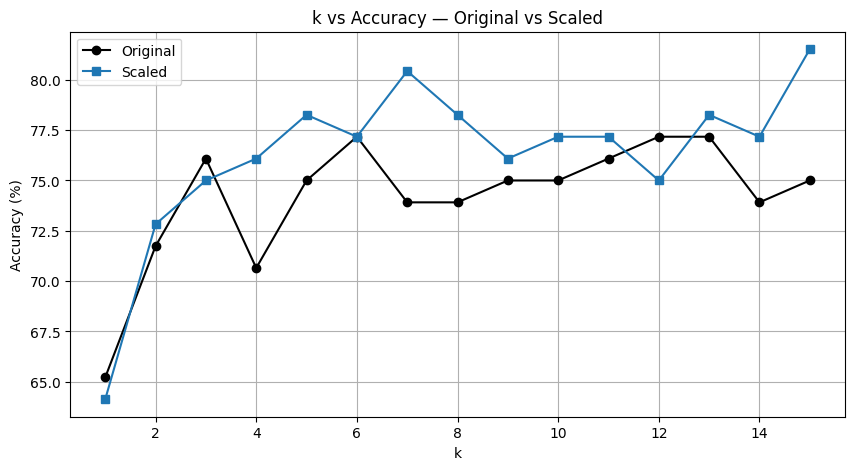

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(k_values, acc_original, marker='o', label="Original",color="black")
plt.plot(k_values, acc_scaled, marker='s', label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy — Original vs Scaled")
plt.grid(True)
plt.legend()
plt.show()


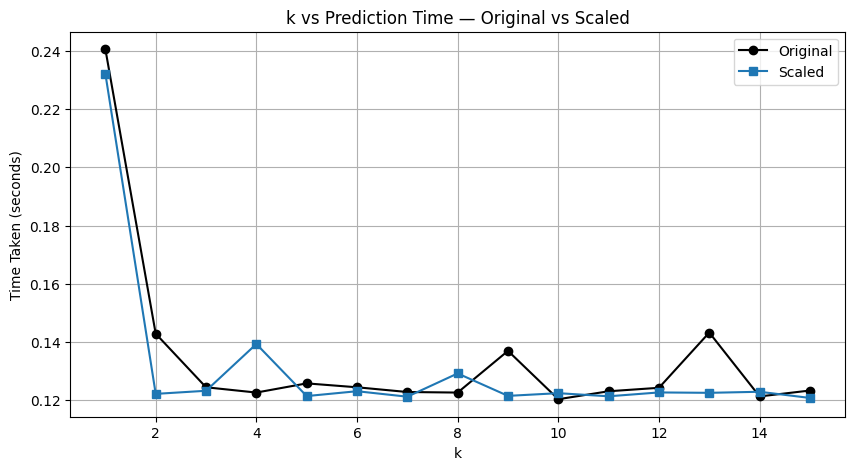

In [65]:
plt.figure(figsize=(10,5))
plt.plot(k_values, time_original, marker='o', label="Original",color="black")
plt.plot(k_values, time_scaled, marker='s', label="Scaled")
plt.xlabel("k")
plt.ylabel("Time Taken (seconds)")
plt.title("k vs Prediction Time — Original vs Scaled")
plt.grid(True)
plt.legend()
plt.show()